# 🔍 Feature Correlation Analysis

This notebook conducts **feature correlation analysis** on the dataset to evaluate relationships between selected variables for **Soil Behavior Type (SBT) classification**.

### **📌 Selected Features**
The following features are used for SBT classification:

- $d$ (Depth)  
- $q_t$ (Cone Resistance)  
- $f_s$ (Sleeve Friction)  
- $u_2$ (Pore Water Pressure)  
- $u_0$ (Hydrostatic Pressure)  

### **📊 Correlation Matrices**
Two correlation matrices are computed:  

1. **Mutual Information (MI)**  
2. **Pearson’s Correlation**  

Both matrices are visualized. Since **Mutual Information (MI) values have no fixed scale**, the MI heatmap is plotted using a **logarithmic color scale** for better interpretability.

### **⚡ Computational Efficiency**
- Calculating the **Mutual Information (MI) matrix** is computationally expensive, as it is derived through **numerical integration based on its mathematical definition**.  
- To optimize performance, the **precomputed MI matrix** is stored as `"mi_matrix.npy"`.  
- If this file exists, the program **loads the stored matrix instead of recalculating**. The calculation is only triggered if `"mi_matrix.npy"` is not found.

---

## 📫 Contact
For any questions or discussions, feel free to reach out via [LinkedIn](https://linkedin.com/in/daniel-t-chou-1b51661b2).


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
from entropyLibDC import *
# Plotting the matrix
from matplotlib.colors import LogNorm,PowerNorm
import os

Loaded existing 'mi_matrix.npy'.


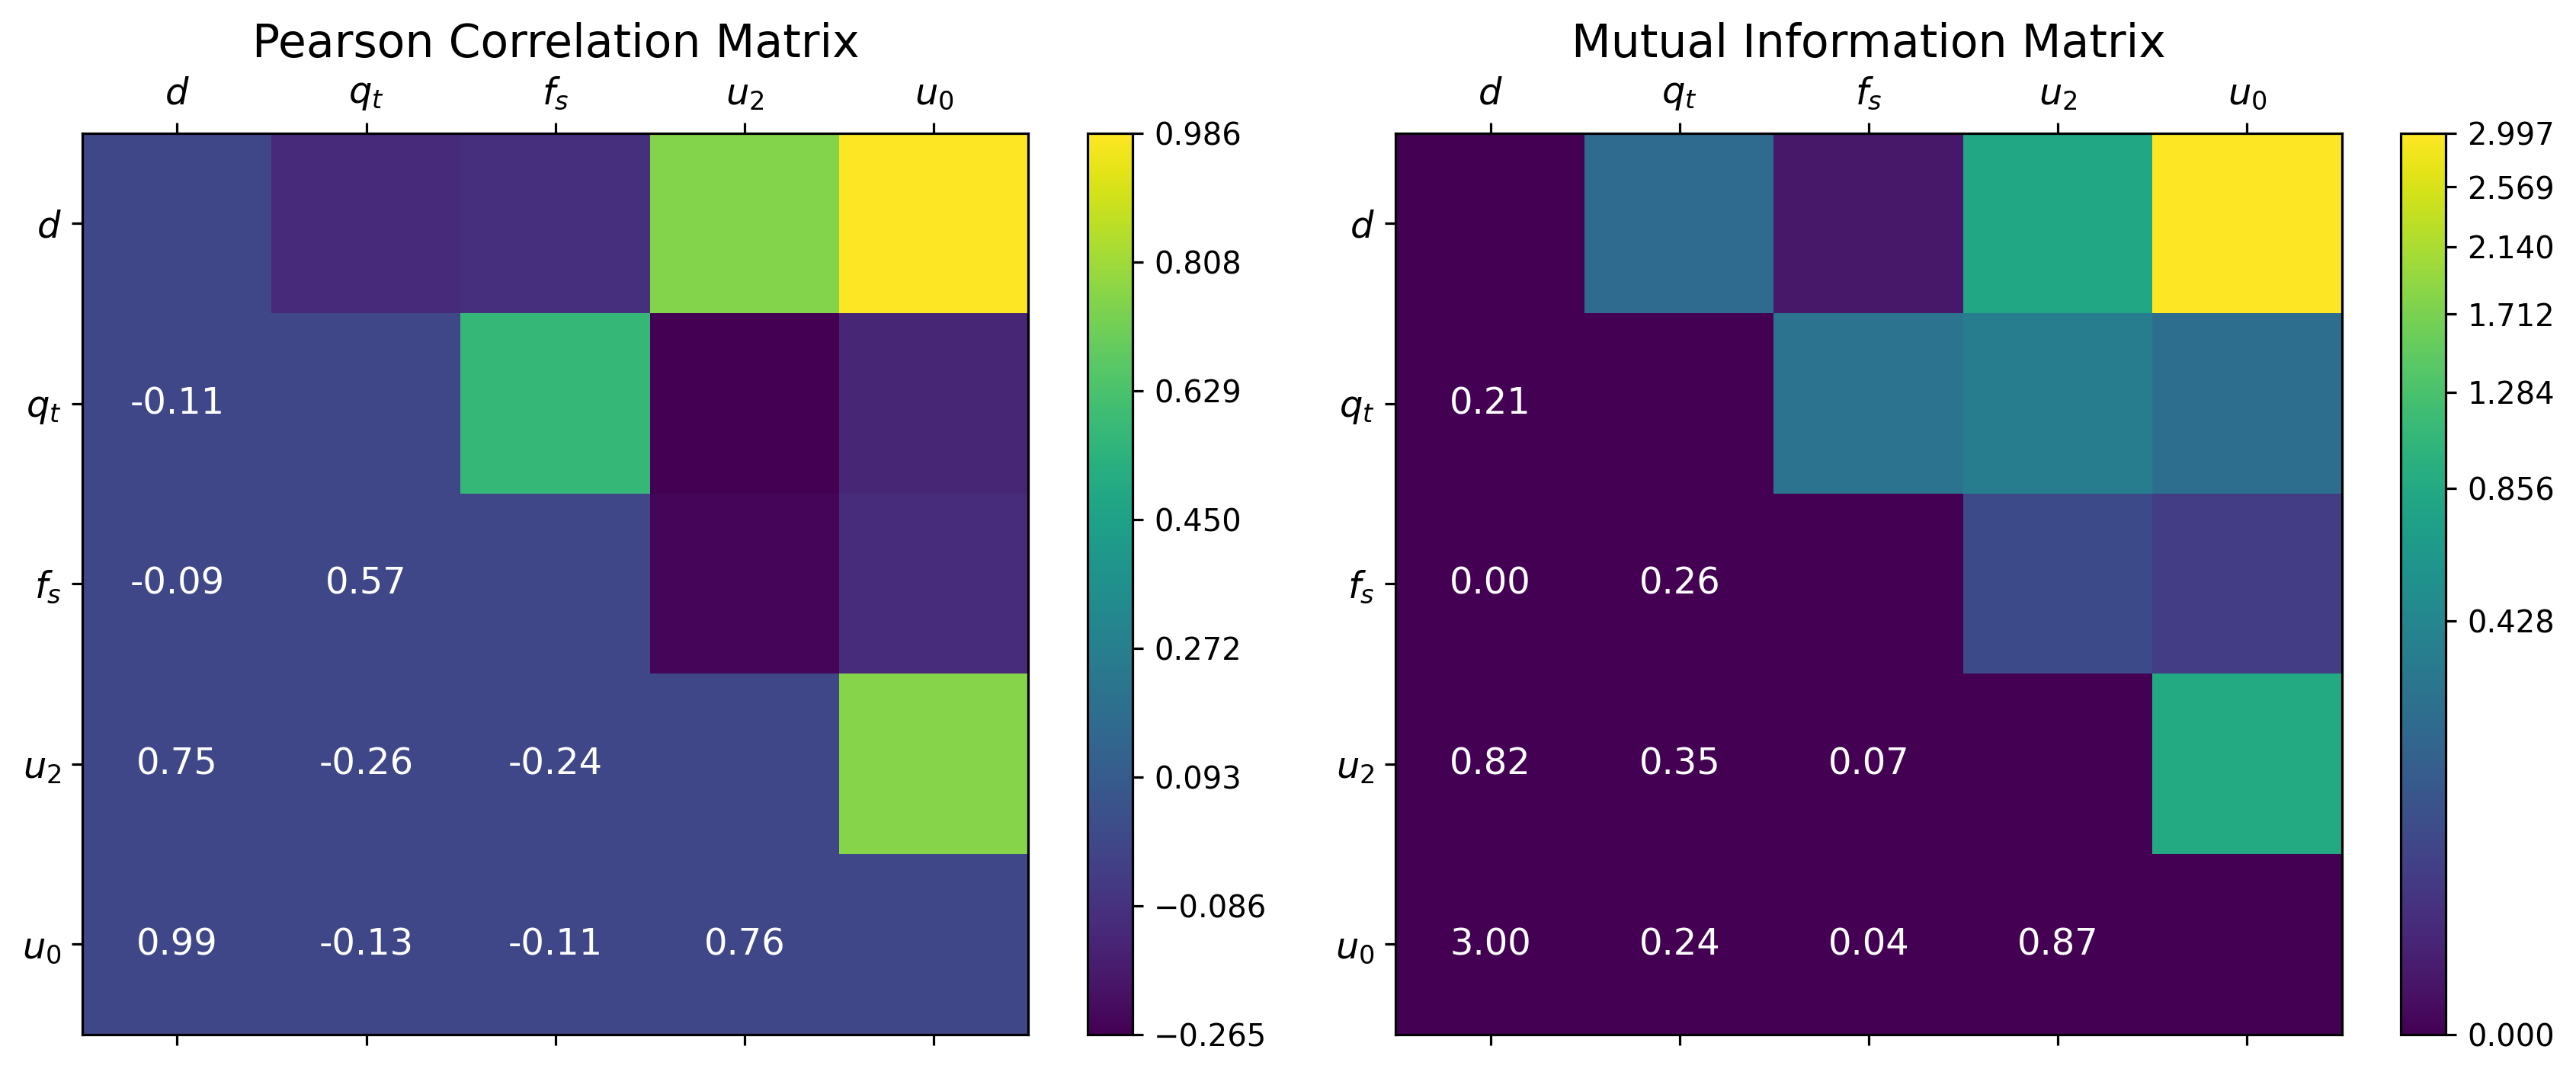

In [2]:
# 📌 Load the cleaned CPTu dataset
df = pd.read_csv("CPTu_cleaned_dataset.csv")

# 📌 Define Features (X) and Target (y)
X = df.drop(columns=["SBT_Zone"])  # Features (excluding target variable)
y = df["SBT_Zone"]  # Target variable

# 🔄 Convert features to NumPy array for computation
x = X.to_numpy()

# 📌 Feature labels for visualization
feature_notations = [r'$d$', r'$q_{t}$', r'$f_{s}$', r'$u_{2}$', r'$u_{0}$']

# 📊 Compute Mutual Information (MI) between features
# Since MI calculation is computationally expensive, a precomputed matrix is loaded if available.
if not os.path.exists("mi_matrix.npy"):
    print("Computing and saving 'mi_matrix.npy'...")
    
    _, dim = x.shape
    mi_matrix = np.zeros([dim, dim])
    
    # Compute MI for each feature pair (upper triangular matrix)
    for i in range(dim):
        for j in range(i + 1, dim):
            mi_matrix[i, j] = Mutual_Information(x[:, i], x[:, j])  # MI Calculation
    
    # Save the computed MI matrix
    np.save("mi_matrix.npy", mi_matrix)
else:
    # Load precomputed MI matrix
    mi_matrix = np.load("mi_matrix.npy")
    print("Loaded existing 'mi_matrix.npy'.")

# 📊 Compute Pearson Correlation Coefficient Matrix
coef_matrix = np.corrcoef(x.T)  # Compute full correlation matrix

# 📌 Extract upper triangular portion (half-matrix for visualization)
_, dim = x.shape
half_matrix = np.zeros([dim, dim])
for i in range(dim):
    for j in range(i + 1, dim):
        half_matrix[i, j] = coef_matrix[i, j]

# 🎨 Create 1×2 subplots for Pearson Correlation & Mutual Information matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=288)

# 📊 Plot Pearson Correlation Matrix
cax1 = axes[0].matshow(half_matrix, cmap="viridis", aspect="auto")
fig.colorbar(cax1, ax=axes[0], ticks=np.linspace(half_matrix.min(), half_matrix.max(), 8))

# 📌 Configure axis labels for Pearson Correlation Matrix
axes[0].set_xticks(np.arange(len(feature_notations)))
axes[0].set_yticks(np.arange(len(feature_notations)))
axes[0].set_xticklabels(feature_notations, rotation=0, fontsize=12)
axes[0].set_yticklabels(feature_notations, fontsize=12)
axes[0].set_title("Pearson Correlation Matrix", fontsize=15)

# 🔢 Add numerical values to the Pearson Correlation Matrix
for i in range(dim):
    for j in range(i + 1, dim):
        axes[0].text(i, j, f"{half_matrix[i, j]:.2f}", ha="center", va="center", color="white", fontsize=12)

# 📊 Plot Mutual Information (MI) Matrix
cax2 = axes[1].matshow(
    mi_matrix, cmap="viridis", aspect="auto",
    norm=PowerNorm(gamma=0.4, vmin=mi_matrix.min(), vmax=mi_matrix.max())
)
fig.colorbar(cax2, ax=axes[1], ticks=np.linspace(0, mi_matrix.max(), 8))

# 📌 Configure axis labels for Mutual Information Matrix
axes[1].set_xticks(np.arange(len(feature_notations)))
axes[1].set_yticks(np.arange(len(feature_notations)))
axes[1].set_xticklabels(feature_notations, rotation=0, fontsize=12)
axes[1].set_yticklabels(feature_notations, fontsize=12)
axes[1].set_title("Mutual Information Matrix", fontsize=15)

# 🔢 Add numerical values to the MI Matrix
for i in range(dim):
    for j in range(i + 1, dim):
        axes[1].text(i, j, f"{mi_matrix[i, j]:.2f}", ha="center", va="center", color="white", fontsize=12)

# 🔄 Adjust layout and display plot
plt.tight_layout()
plt.show()